In [171]:
import pandas as pd
import os
from pathlib import Path
df = pd.read_csv("../tos_data/tos_data.csv", error_bad_lines=False)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21278 entries, 0 to 21277
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Length     21278 non-null  int64 
 1   Link       21278 non-null  object
 2   Original   21278 non-null  object
 3   Processed  21278 non-null  object
dtypes: int64(1), object(3)
memory usage: 665.1+ KB


In [172]:
def remove_multiple_space(sentence):
    clear_sentence = ' '.join(sentence.split())
    clear_sentence = clear_sentence.lower()
    return clear_sentence

df['Original'] = df['Original'].apply(remove_multiple_space)
df['Processed'] = df['Processed'].apply(remove_multiple_space)
df

,Length,Link,Original,Processed
0,107,https://policies.google.com/terms?hl=en-US,". as a result, these terms of service help def...",result term service help define google relatio...
1,94,https://policies.google.com/terms?hl=en-US,", which describes the intellectual property ri...",describe intellectual property right content f...
2,53,https://policies.google.com/terms?hl=en-US,", which describes other legal rights you have,...",describe legal right expect case someone viola...
3,48,https://policies.google.com/terms?hl=en-US,understanding these terms is important because...,understand term important use service agree term
4,51,https://policies.google.com/terms?hl=en-US,". although it’s not part of these terms, we en...",although part term encourage read better under...
...,...,...,...,...
21273,73,https://nuacom.ie/terms-conditions/,19.1. headings are included in this gtc for co...,head include gtc convenience shall affect cons...
21274,400,https://nuacom.ie/terms-conditions/,20.1. these gtc together with any documents ex...,gtc together document expressly refer contain ...
21275,85,https://nuacom.ie/terms-conditions/,21.1. if any part of these gtc shall be found ...,part gtc shall find unlawful shall affect vali...
21276,100,https://nuacom.ie/terms-conditions/,21.2. this contract is and shall have deemed t...,contract shall deem make republic ireland shal...


In [173]:
df_sorted = df.copy()
#df_sorted = df.sort_values(by='Length', ascending=False)
#df_sorted

In [174]:
df_sorted.describe(include=[object])
# unique: the number of unique sentences.
# top: the most common value.
# freq: the most common value's frequency.

,Link,Original,Processed
count,21278,21278,21278
unique,264,19914,19570
top,https://asana.com/terms,these support terms describe the packages of s...,statement good faith belief use material manne...
freq,857,10,15


In [175]:
df_sorted.describe(exclude=[object])

,Length
count,21278.000000
mean,268.914842
std,233.613154
min,32.000000
25%,116.000000
50%,194.000000
75%,340.000000
max,3971.000000


In [176]:
df_sorted = df_sorted.drop(columns=['Length', 'Processed'])
#df_temp = df_sorted[0:2]
#df_temp

In [177]:
import re
def split_sentence(sentence):
    #t_list = sentence.split('.')
    t_list = re.split(r'[.;]', sentence)

    return t_list

# 수정 필요.
df_sorted_result = pd.DataFrame(columns=['Link', 'Original'])
for i, row in df_sorted.iterrows():
    t_list = split_sentence(row['Original'])
    for s in t_list:
        new_row = {
            'Link': row['Link'],
            'Original': s,
        }
        df_sorted_result = df_sorted_result.append(new_row, ignore_index=True)

df_sorted_result = df_sorted_result[df_sorted_result['Original'] != '']
df_sorted_result



,Link,Original
1,https://policies.google.com/terms?hl=en-US,"as a result, these terms of service help defi..."
2,https://policies.google.com/terms?hl=en-US,"for example, these terms include the followin..."
3,https://policies.google.com/terms?hl=en-US,", which describes the intellectual property ri..."
4,https://policies.google.com/terms?hl=en-US,", which describes other legal rights you have,..."
5,https://policies.google.com/terms?hl=en-US,understanding these terms is important because...
...,...,...
77672,https://nuacom.ie/terms-conditions/,2
77673,https://nuacom.ie/terms-conditions/,this contract is and shall have deemed to hav...
77675,https://nuacom.ie/terms-conditions/,21
77676,https://nuacom.ie/terms-conditions/,3


In [178]:
#split_sentence("(ii) willful or grossly negligent. behavior(i)willful or grossly negligent behavior(iii)willful or grossly negligent behavior")
# t = re.split('[;.]', "(ii) willful or grossly negligent. behavior(i)willful; or grossly negligent behavior(iii)willful or grossly negligent behavior")
# t
# How to parse (i), (ii), and (iii)?

In [179]:
df_sorted_result['Length'] = 0
df_sorted_result['Length'] = df_sorted_result['Original'].apply(lambda x: len(x))
df_sorted_result = df_sorted_result[['Length', 'Link', 'Original']]
#df_sorted_result = df_sorted_result.sort_values(by='Length', ascending=False)
df_sorted_result = df_sorted_result.drop_duplicates(['Original'])
df_sorted_result

,Length,Link,Original
1,113,https://policies.google.com/terms?hl=en-US,"as a result, these terms of service help defi..."
2,63,https://policies.google.com/terms?hl=en-US,"for example, these terms include the followin..."
3,147,https://policies.google.com/terms?hl=en-US,", which describes the intellectual property ri..."
4,102,https://policies.google.com/terms?hl=en-US,", which describes other legal rights you have,..."
5,101,https://policies.google.com/terms?hl=en-US,understanding these terms is important because...
...,...,...,...
77664,120,https://nuacom.ie/terms-conditions/,no oral explanation or oral information given...
77665,274,https://nuacom.ie/terms-conditions/,"in agreeing to these terms and conditions, yo..."
77669,145,https://nuacom.ie/terms-conditions/,if any part of these gtc shall be found to be...
77673,176,https://nuacom.ie/terms-conditions/,this contract is and shall have deemed to hav...


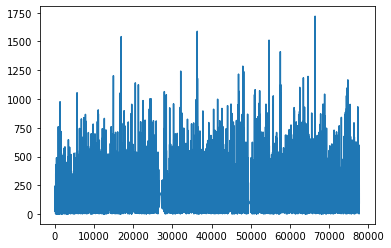

In [180]:
# import seaborn as sns
# sns.displot(df_sorted_result['Length'], hist=False)
from matplotlib import pyplot as plt
plt.plot(df_sorted_result['Length'])
plt.show()

In [181]:
#df_sorted_result.to_csv(Path(os.getcwd() + "/" + "descending_length_tos_data.csv"), index=False)

In [182]:
#df_sorted_result.describe(exclude=object)

In [183]:
# 마침표 단위로 문장 자르기.
# 길이 다시 계산 후 길이 열 드랍.
#문장 랜덤 배치(To remove learning bias.)

In [184]:
#df_sorted.to_csv(Path(os.getcwd() + "/" + "mturk_sorted_tos_data.csv"), index=False)